In [1]:
!pip install praw
!pip install pytrends

     |████████████████████████████████| 153kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 204kB 7.6MB/s eta 0:00:01


In [499]:
import praw 
import pandas as pd
import numpy as np
import pandas as pd               
import matplotlib.pyplot as plt
from datetime import datetime
from pytrends.request import TrendReq
pytrend = TrendReq()

In [149]:
Company_Names = ["AMZN", "MSFT","AAPL", "TSLA","NFLX","FB","V","NVDA","GOOG","ZM","BA","INTC",'AMD',"F","GE","AAL",\
                 "DIS", "DAL", "CCL", "SNAP","UAL","BABA","UBER","TWTR","SBUX","SPY","QQQ","BYND","SQ","PENN",\
                 "XOM", "SHOP","ATVI","WMT","MRNA","JPM","GS","C","SNE","MGM"]

In [381]:
#Connect to reddit
reddit = praw.Reddit(client_id="j0mFN3SpgtQbPQ",
                    client_secret = "v-yTMECiZKPRUE1LkIdJPmCnTRU",
                    username= "************", 
                    password = "************", 
                    user_agent= "sentimendDatav01")

In [468]:
#Call subreddits as wanted
wsb_sub = reddit.subreddit("wallstreetbets")
options_sub = reddit.subreddit("options")
Robinhood_sub = reddit.subreddit("Robinhood")
investing_sub = reddit.subreddit("investing")

In [469]:
#Call hot posts from subreddit
hot_wsb_sub = wsb_sub.hot(limit=20)  
hot_options_sub = options_sub.hot(limit=5)
hot_Robinhood_sub = Robinhood_sub.hot(limit=5)
hot_investing_sub = investing_sub.hot(limit=5)

In [470]:
#Call new posts from subreddit
new_wsb_sub = wsb_sub.new(limit=20)  
new_options_sub = options_sub.new(limit=20)
new_Robinhood_sub = Robinhood_sub.new(limit=20)
new_investing_sub = investing_sub.new(limit=20)

In [471]:
print(dir(submission))        

['STR_FIELD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chunk', '_comments', '_comments_by_id', '_fetch', '_fetch_data', '_fetch_info', '_fetched', '_kind', '_reddit', '_reset_attributes', '_safely_add_arguments', '_url_parts', '_vote', 'all_awardings', 'allow_live_comments', 'approved_at_utc', 'approved_by', 'archived', 'author', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'author_flair_type', 'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders', 'banned_at_utc', 'banned_by', 'can_gild', 'can_mod_post', 'category', 'clear_vote', 'clicked',

In [472]:
#Generate list of comments under hot/new posts
wsb_post_list = []
wsb_comment_list = []

for submission in hot_wsb_sub:
    if not submission.stickied:
        wsb_post_list.append(submission.title)
        print("WSB Title:{}".format(submission.title))
        submission.comments.replace_more(limit=5)
        
        for comment in submission.comments.list():
            
            wsb_comment_list.append(comment.body)
            

options_post_list = []
options_comment_list = []

for submission in hot_options_sub:
    if not submission.stickied:
        options_post_list.append(submission.title)
        print("options Title:{}".format(submission.title))
        submission.comments.replace_more(limit=5)
        
        for comment in submission.comments.list():
            
            options_comment_list.append(comment.body)
            

Robinhood_post_list = []
Robinhood_comment_list = []
            
for submission in hot_Robinhood_sub:
    if not submission.stickied:
        Robinhood_post_list.append(submission.title)
        print("Robinhood Title:{}".format(submission.title))
        submission.comments.replace_more(limit=5)
        
        for comment in submission.comments.list():
            
            Robinhood_comment_list.append(comment.body)
            
print(np.shape(wsb_comment_list))
print(np.shape(options_comment_list))
print(np.shape(Robinhood_comment_list))

WSB Title:SEC when they visit our future building in wallstreet
WSB Title:Robinhood banned me for making too much money...
WSB Title:Don’t forget just one FD can change a child’s life.
WSB Title:Bears feasting on AAPL next week confirmed
WSB Title:Ready to actually start making a lotta bit of money?
WSB Title:Can’t make this shit up. The paper menu doesn’t lie, $Dennys cal for 690-900% gainz.
WSB Title:FT: Nikola founder bought truck designs from third party
WSB Title:Nikola is completely Fucked. Trevor Milton and his merry band of retards are finished
WSB Title:I do technical analysis so you don’t have to -Saturday edition. FB + AAPL
WSB Title:$DIS Reported to be in talks with U.S. military to develop ICBMs
WSB Title:Listen up retards. Papa Elon needs our help for the war effort.
WSB Title:📱 🚀🚀[OCT 12] APPLE IPHONE 12 LAUNCH DATE LEAKED (🏳️‍🌈🐻 stay away)🚀🚀
WSB Title:I am a volunteer in Moderna’s phase 3 clinical trial for a Covid vaccine. Ask me anything.
WSB Title:NKLA is fucked. Her

In [473]:
#Adjust Company_Names so indexing finds exact matches
C_N_strings = []

for x in Company_Names:
    string = "{0}{1}{0}".format(" ",x)
    
    C_N_strings.append(string)

In [474]:
matching = [s for s in wsb_comment_list if any(xs in s for xs in C_N_strings)]

upside_strings = ["up","gain"," win ","tendies","free","moon","good","profit","amazing","beat","buy"]
upside_matching = [s for s in matching if any(xs in s for xs in upside_strings)]

downside_strings = ["down","loss","losing","bad","dead","shit","stupid","fail","trouble","miss","sell"]
downside_matching = [s for s in matching if any(xs in s for xs in downside_strings)]


In [483]:
match_strings = [" WMT "]
ticker_matching = [s for s in matching if any(xs in s for xs in match_strings)]
ticker_matching

['I go as far in the money as I can.  At least 5% outside of the weeks high/low ideally.  \n\nI don\'t look at greeks or use a scanner or anything.  I literally poke at my phone for about a half hour on options on high volatility stocks until I find a spread that leaves "meat on the bone" as it were.\n\nThat\'s why I settled on such a low yield strategy.  I\'m REALLY fucking bad at this shit.  If I\'d had margin available over the last month, I\'d owe RH my children by now. \n\nSeriously, I like Tesla, NVDA, AMZN, MU, ZM, WMT (memey), or anything else that everyone on WSB is drooling over today.  I\'m pretty good with mental math so I just scroll through the option contracts and look for variances between strike  prices that I can grab onto']

In [478]:
wsb_comment_upside_list = []
wsb_upside_occurence = []

for company in C_N_strings:
    ticker_matching = [s for s in upside_matching if company in s]
    
    #print("Searched for {}".format(company))  
    wsb_comment_upside_list.append(np.shape(ticker_matching)[0])


wsb_comment_downside_list = []
wsb_downside_occurence = []

for company in C_N_strings:
    ticker_matching = [s for s in downside_matching if company in s]
    
    #print("Searched for {}".format(company))  
    wsb_comment_downside_list.append(np.shape(ticker_matching)[0])


In [479]:
#Loop through Company Names in all comments and calculate # of matches
wsb_comment_count_list = []
wsb_occurence_list = []

for company in C_N_strings:
    ticker_matching = [s for s in matching if company in s]
    
    print("Searched for {}".format(company))  
    wsb_occurence_list.append(np.shape(ticker_matching)[0])


Searched for  AMZN 
Searched for  MSFT 
Searched for  AAPL 
Searched for  TSLA 
Searched for  NFLX 
Searched for  FB 
Searched for  V 
Searched for  NVDA 
Searched for  GOOG 
Searched for  ZM 
Searched for  BA 
Searched for  INTC 
Searched for  AMD 
Searched for  F 
Searched for  GE 
Searched for  AAL 
Searched for  DIS 
Searched for  DAL 
Searched for  CCL 
Searched for  SNAP 
Searched for  UAL 
Searched for  BABA 
Searched for  UBER 
Searched for  TWTR 
Searched for  SBUX 
Searched for  SPY 
Searched for  QQQ 
Searched for  BYND 
Searched for  SQ 
Searched for  PENN 
Searched for  XOM 
Searched for  SHOP 
Searched for  ATVI 
Searched for  WMT 
Searched for  MRNA 
Searched for  JPM 
Searched for  GS 
Searched for  C 
Searched for  SNE 
Searched for  MGM 


In [551]:
reddit_companies_df = pd.DataFrame({"Tickers": Company_Names,"All_Occurences on r/WSB":wsb_occurence_list,\
                                    "Upside on r/WSB": wsb_comment_upside_list,\
                                    "Downside on r/WSB": wsb_comment_downside_list})
reddit_companies_df["Net Upside(Downside) Sentiment"] = (reddit_companies_df["Upside on r/WSB"] - \
                                                         reddit_companies_df["Downside on r/WSB"])
reddit_companies_df

,Tickers,All_Occurences on r/WSB,Upside on r/WSB,Downside on r/WSB,Net Upside(Downside) Sentiment
0,AMZN,3,2,2,0
1,MSFT,1,1,1,0
2,AAPL,20,11,6,5
3,TSLA,8,3,3,0
4,NFLX,0,0,0,0
5,FB,6,2,0,2
6,V,1,0,0,0
7,NVDA,0,0,0,0
8,GOOG,0,0,0,0
9,ZM,0,0,0,0


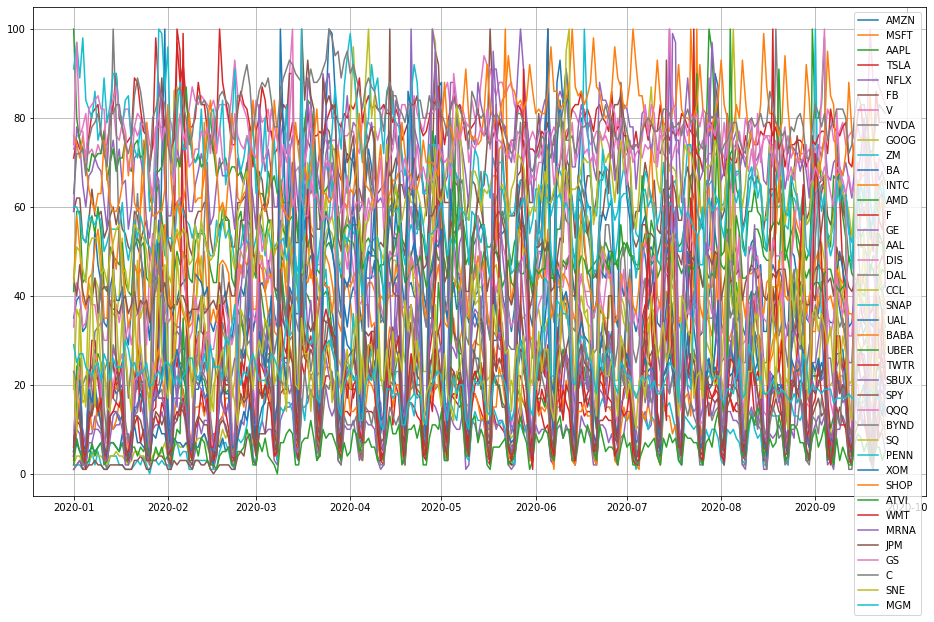

In [542]:
latest_trends_list = []
days_since_top_list = []
current_trend_from_max_list = []
date_index_list = []

today = datetime.today()

for x in Company_Names:
    search_term = [x]
    pytrend.build_payload(search_term, cat=0, timeframe='2020-01-01 2020-09-26', geo='US', gprop='')
    df = pytrend.interest_over_time()
    
    latest_trend = df[x][-1]
    latest_trends_list.append(latest_trend)
    column = df[x]
    max_index = column.idxmax()
    date = str(max_index)
    date_index = date[0:10]
    date_index_list.append(date_index)
    dt_object = datetime.strptime(date_index,"%Y-%m-%d")
    
    days_since_top = today - dt_object
    days_since_top_list.append(days_since_top.days)
    
    current_trend_from_max = latest_trend - 100 
    current_trend_from_max_list.append(current_trend_from_max)
    

In [543]:
google_trends_df = pd.DataFrame({"Ticker": Company_Names, "Latest Trend": latest_trends_list, \
                                "Date of Top Trend": date_index_list,"Days since Top Trend": days_since_top_list, \
                                 "Distance from Max": current_trend_from_max_list})

In [544]:

google_trends_df

,Ticker,Latest Trend,Date of Top Trend,Days since Top Trend,Distance from Max
0,AMZN,33,2020-01-31,240,-67
1,MSFT,27,2020-07-22,67,-73
2,AAPL,45,2020-08-31,27,-55
3,TSLA,42,2020-02-04,236,-58
4,NFLX,5,2020-04-21,159,-95
5,FB,59,2020-05-17,133,-41
6,V,83,2020-09-19,8,-17
7,NVDA,29,2020-08-19,39,-71
8,GOOG,39,2020-04-28,152,-61
9,ZM,25,2020-09-01,26,-75


[*********************100%***********************]  1 of 1 completed


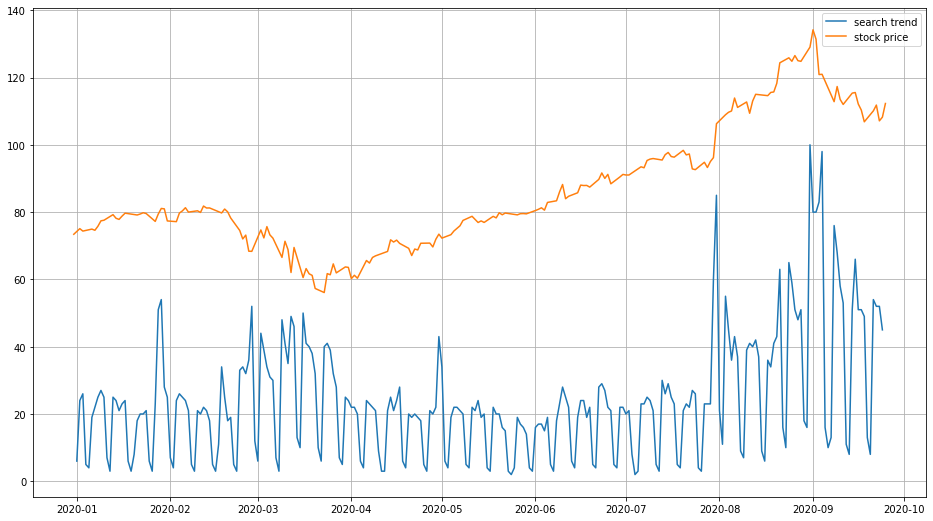

In [549]:
import yfinance as yf

search_term = ["AAPL"]
pytrend.build_payload(search_term, cat=0, timeframe='2020-01-01 2020-09-26', geo='US', gprop='')
df = pytrend.interest_over_time()

data = yf.download(search_term, start ="2020-01-01")
data_close  = data["Close"]

plt.figure(figsize=(16,9))
plt.grid()
plt.plot(df[search_term], label = "search trend")
plt.plot(data_close, label = "stock price")
plt.legend()

#1 Week MA Price vs 1 Week MA Trends
#1 Week Vol vs 1 Week Trends MA/Vol

In [379]:
#options_comment_count_list = []
#options_occurence_list = []

#for company in C_N_strings:
#    for comment in options_comment_list:
#        options_comment_count_list.append(comment.count(company))
#    
#        options_occurence = np.sum(options_comment_count_list)
#    print("Searched for {}".format(company))    
#    options_occurence_list.append(options_occurence)
#beg_int = 0
#options_occurence_list.insert(0,beg_int)
#options_occurence_list_diff = np.diff(options_occurence_list)

In [380]:
#Robinhood_comment_count_list = []
#Robinhood_occurence_list = []

#for company in C_N_strings:
#    for comment in Robinhood_comment_list:
#        Robinhood_comment_count_list.append(comment.count(company))
#    
#        Robinhood_occurence = np.sum(Robinhood_comment_count_list)
#    print("Searched for {}".format(company))    
#    Robinhood_occurence_list.append(Robinhood_occurence)
#beg_int = 0
#Robinhood_occurence_list.insert(0,beg_int)
#Robinhood_occurence_list_diff = np.diff(Robinhood_occurence_list)

In [550]:
df = pytrend.trending_searches(pn="united_states")

In [ ]:
#Macro DF
#Date // Upside Indicators // Downside Indicators //

In [ ]:
#Micro DF
# Ticker // historic Search Indicator // Reddit sentiment

In [ ]:
#Add gtrends to df
#merge option dfs and run on tf
#upload merged tf
#process setup of macro & micro DFs